# Classifier Check

## Import

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
# TODO REMOVE does not improve much with hyperparameter tuning
# from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import RandomizedSearchCV



from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

## Import Data

In [5]:
X_test = pd.read_csv('test.csv')
X_train = pd.read_csv('train.csv')
y_train = X_train['label']
X_train = X_train.drop(columns='label')
X_train.shape

(50000, 28)

## Ensemble Models

In [53]:
gradBoost = GradientBoostingClassifier()
scores = cross_val_score(gradBoost, X_train, y_train, cv=5)
scores
# reg array([0.7169, 0.7056, 0.7096, 0.7049, 0.7091])
# standardscale

array([0.5424, 0.5475, 0.5447, 0.548 , 0.5486])

In [54]:
histBoost = HistGradientBoostingClassifier()
scores = cross_val_score(histBoost, X_train, y_train, cv=5)
scores

array([0.5489, 0.5453, 0.539 , 0.5456, 0.5495])

In [37]:
bagging = BaggingClassifier()
scores = cross_val_score(bagging, X_train, y_train, cv=5)
scores

array([0.6782, 0.6787, 0.6746, 0.6791, 0.6761])

In [171]:
adaBoost = AdaBoostClassifier()
scores = cross_val_score(adaBoost, X_train, y_train, cv=5)
scores
# array([0.6956, 0.6809, 0.683 , 0.6839, 0.682 ])
# array([0.6816, 0.6716, 0.6773, 0.6689, 0.6728])

array([0.6956, 0.6809, 0.683 , 0.6839, 0.682 ])

In [17]:
randomF = RandomForestClassifier()
scores = cross_val_score(randomF, X_train, y_train, cv=5)
scores

array([0.71725 , 0.708125, 0.709   , 0.703   , 0.70725 ])

In [52]:
votingClassifier = VotingClassifier(estimators=[('rf',randomF), ('lr', lr)])
scores = cross_val_score(votingClassifier, X_train, y_train, cv=5)
scores

array([0.6912, 0.6875, 0.6811, 0.678 , 0.6795])

In [8]:
xgboost = xgb.XGBClassifier()
scores = cross_val_score(xgboost, X_train, y_train, cv=5)
scores

array([0.7148, 0.7137, 0.7092, 0.7159, 0.7077])

## Weak Classification Models

In [202]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.625 , 0.6236, 0.6311, 0.6238, 0.625 ])

In [236]:
X_valid = train_csv[40000:]
X_train = train_csv[:40000]
y_train = X_train['label']
y_valid = X_valid['label']
X_valid = X_valid.drop(columns=['label'])
X_train = X_train.drop(columns=['label'])
# X_valid = X_valid.drop(columns=['f8', 'f12', 'f16', 'f20', 'label'])
# X_train = X_train.drop(columns=['f8', 'f12', 'f16', 'f20', 'label'])

# randomF = RandomForestClassifier()
# scores = cross_val_score(randomF, X_train, y_train, cv=5)
# scores

# adaBoost = AdaBoostClassifier()
# scores = cross_val_score(adaBoost, X_train, y_train, cv=5)
# scores
# array([0.6956, 0.6809, 0.683 , 0.6839, 0.682 ])
dt.fit(X_train,y_train)
dt.score(X_valid, y_valid)
# 0.6253
# 0.6293

0.6324

In [237]:
print()
print(dt.feature_importances_)
# dt.feature_importances_[dt.feature_importances_ < 0.009]
# 9, 13, 17, 21



[0.04392117 0.03006358 0.0297445  0.03587628 0.0284739  0.05268571
 0.02685009 0.03041806 0.00439708 0.03292693 0.02829538 0.02906475
 0.00487199 0.03083601 0.02872632 0.03227522 0.00371027 0.02841065
 0.02780978 0.02874803 0.00331567 0.0396551  0.04908906 0.03637377
 0.05566806 0.12644388 0.05816715 0.07318161]


In [58]:
lr = LogisticRegression(penalty='none')
scores = cross_val_score(lr, X_train, y_train, cv=5)
scores
# array([0.6456, 0.6451, 0.6399, 0.6352, 0.6353])

array([0.6464, 0.646 , 0.6405, 0.6355, 0.6359])

In [106]:
#mini-batch is faster than using all data?l 
sgd = SGDClassifier()
scores = cross_val_score(sgd, X_train, y_train, cv=5)
scores

array([0.6296, 0.6358, 0.6293, 0.6324, 0.6311])

In [102]:
# Does better normalized
X_normalize = normalize(X_train, 'l1')
nb = GaussianNB()
scores = cross_val_score(nb, X_normalize, y_train, cv=5)
scores

array([0.6329, 0.6323, 0.6245, 0.6185, 0.6263])

Next steps? 
Select a single method and test on it running standardization, randomcv
potentially use select k best features? Run a random forest or decision tree to find the most important features

submit 3 different scores tmrw

## Random CV

In [130]:
from scipy.stats import uniform as sp_randFloat
print(sp_randFloat())

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [197]:
max_depth = np.arange(1,30).tolist()
# max_depth.append('none')
max_leaf_nodes = np.arange(3,30).tolist()
# max_leaf_nodes.append('None')
max_leaf_nodes

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [198]:
# standardScaler = StandardScaler()
# X_scaledData = standardScaler.fit_transform(X_train)
param_distributions = dict(
    criterion=['gini', 'entropy'],
    splitter=['best', 'random'],
    max_depth=max_depth,
    min_samples_split=np.arange(2,30).tolist(),
    min_samples_leaf=np.arange(1,30).tolist(),
#     max_leaf_nodes=max_leaf_nodes,
    max_features=['sqrt', 'log2', 'auto']
)

dt = DecisionTreeClassifier()
clf = RandomizedSearchCV(dt, param_distributions, random_state=0, cv=3)
search = clf.fit(X_train, y_train)
search.best_params_
search.best_score_
search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=6)

In [200]:
search.best_score_
search.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'entropy'}

In [201]:
#mini-batch is faster than using all data?l 
dt = DecisionTreeClassifier(splitter='best', min_samples_split=6, min_samples_leaf=2, max_features='sqrt', max_depth=7, criterion='entropy')
scores = cross_val_score(sgd, X_train, y_train, cv=5)
scores

array([0.6254, 0.624 , 0.6215, 0.6284, 0.6079])

In [172]:
# bagging = BaggingClassifier(base_estimator=dt)
# scores = cross_val_score(bagging, X_train, y_train, cv=5)
# scores

adaBoost = AdaBoostClassifier(base_estimator=dt)
scores = cross_val_score(adaBoost, X_train, y_train, cv=5)
scores

array([0.6476, 0.6526, 0.6461, 0.6423, 0.6503])

# PCA Analysis

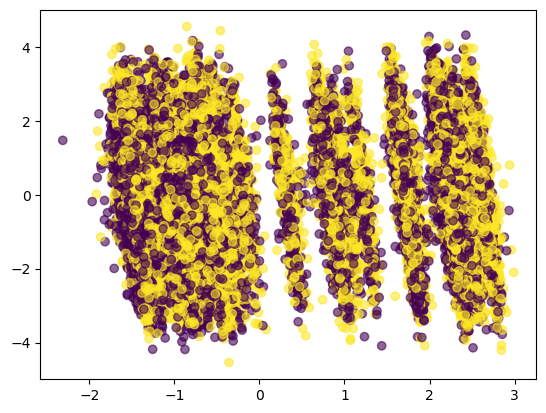

In [51]:
standardScaler = StandardScaler()
scaledData = standardScaler.fit_transform(X_train)
# x_pca = PCA(n_components=2).fit_transform(scaledData)
x_pca = PCA(n_components=2).fit_transform(X_train)

plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.6,c=y_train)

# Evaluation Metric

Validation AUROC: 0.7515464846252402


Text(0, 0.5, 'True Positive Rate')

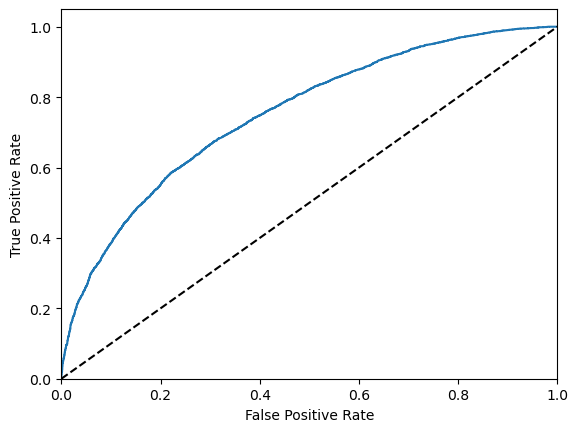

In [38]:
from sklearn import metrics
train_csv = pd.read_csv('train.csv')

X_valid = train_csv[40000:]
X_train = train_csv[:40000]
y_train = X_train['label']
y_valid = X_valid['label']
X_valid = X_valid.drop(columns='label')
X_train = X_train.drop(columns='label')
# X_train = X_train.drop(columns='label')
# X_train.shape
# X_valid
# X_train
y_valid.shape
adaBoost.fit(X_train, y_train)
pred = adaBoost.predict_proba(X_valid)[:,1]

# Compute AUROC.
val = metrics.roc_auc_score(y_valid, pred)
print(f'Validation AUROC: {val}' )

# Plot ROC curve.
fpr, tpr, thresholds = metrics.roc_curve(y_valid, pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')